In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\JEEVAN\Documents\vinod sir notes\Machine Learning\SVM\bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
# Checking the null values in the data
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Their is no null values present in data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [9]:
df.education=np.where(df.education=='basic.4y','Basic',df.education)
df.education=np.where(df.education=='basic.6y','Basic',df.education)
df.education=np.where(df.education=='basic.9y','Basic',df.education)

In [10]:
# seprating the categorical variable

catvar=df.describe(include='O').columns
catvar

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [11]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
for i in catvar:
    print(df[i].unique())
    print(i,'=',len(df[i].unique()),'\n')

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
job = 12 

['married' 'single' 'divorced' 'unknown']
marital = 4 

['Basic' 'high.school' 'professional.course' 'unknown' 'university.degree'
 'illiterate']
education = 6 

['no' 'unknown' 'yes']
default = 3 

['no' 'yes' 'unknown']
housing = 3 

['no' 'yes' 'unknown']
loan = 3 

['telephone' 'cellular']
contact = 2 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
month = 10 

['mon' 'tue' 'wed' 'thu' 'fri']
day_of_week = 5 

['nonexistent' 'failure' 'success']
poutcome = 3 

['no' 'yes']
y = 2 



In [13]:
catvar=catvar.drop('y')

In [14]:
catvar=df[catvar]

In [15]:
df.y.replace(['no','yes'],[0,1],inplace=True)

In [16]:
df_dummies=pd.get_dummies(catvar,drop_first=True)

In [17]:
catvar.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [18]:
list(catvar.columns)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [19]:
df1=[]
a=list(catvar.columns)
for i in df.columns:
    if i not in a:
        df1.append(i)

In [20]:
df1=df[df1]

In [21]:
new_df=pd.concat([df1,df_dummies],axis=1)

In [23]:
X=new_df.loc[:,new_df.columns!='y']
y=new_df.loc[:,new_df.columns=='y']

In [26]:
# if the feature having a negative value it won't consider so we have removed 2 variable

X.drop(['cons.conf.idx','emp.var.rate'],axis=1,inplace=True)

In [27]:
X

,age,duration,campaign,pdays,previous,cons.price.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,93.994,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,93.994,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,93.994,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,93.994,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,1.028,4963.6,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,94.767,1.028,4963.6,1,0,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,94.767,1.028,4963.6,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,94.767,1.028,4963.6,0,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# applying selectkBest class to extract top 20 best feature
# if the feature having a negative value it won't consider so we have removed 2 variable

bestfeatures=SelectKBest(score_func=chi2,k=20)
fit=bestfeatures.fit(X,y)

In [29]:
pd.set_option('display.max_columns',None)

In [30]:
X

,age,duration,campaign,pdays,previous,cons.price.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,93.994,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,93.994,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,93.994,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,93.994,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,94.767,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,94.767,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,94.767,1.028,4963.6,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [31]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [32]:
# concat two dataframes for better visualization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']     # naming the dataframe columns

In [33]:
featureScores

,Specs,Score
0,age,1.032741e+02
1,duration,1.760733e+06
2,campaign,5.419719e+02
3,pdays,1.578258e+05
4,previous,3.090172e+03
5,cons.price.idx,2.736151e+00
6,euribor3m,3.240974e+03
7,nr.employed,5.234582e+03
8,job_blue-collar,1.768769e+02
9,job_entrepreneur,1.100651e+01


In [34]:
print(featureScores.nlargest(20,'Score'))    # print 10 best feature

                   Specs         Score
1               duration  1.760733e+06
3                  pdays  1.578258e+05
7            nr.employed  5.234582e+03
48      poutcome_success  3.982548e+03
6              euribor3m  3.240974e+03
4               previous  3.090172e+03
38             month_mar  8.429166e+02
41             month_oct  7.636446e+02
42             month_sep  6.455410e+02
33     contact_telephone  5.479583e+02
2               campaign  5.419719e+02
15           job_student  3.558646e+02
12           job_retired  3.356629e+02
39             month_may  3.214233e+02
27       default_unknown  3.213204e+02
35             month_dec  2.578878e+02
47  poutcome_nonexistent  2.106276e+02
8        job_blue-collar  1.768769e+02
0                    age  1.032741e+02
20        marital_single  8.679950e+01


In [35]:
# Feature importance

from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [36]:
print(model.feature_importances_)

[8.13548977e-02 2.45345677e-01 5.76693342e-02 4.67074829e-02
 1.27798747e-02 1.92270437e-02 9.69432115e-02 4.88709797e-02
 1.09641769e-02 5.32872168e-03 4.41464911e-03 9.43675203e-03
 8.04609546e-03 5.85420565e-03 8.28261265e-03 5.82457120e-03
 1.41542790e-02 5.48074017e-03 2.35923204e-03 1.70114432e-02
 1.39170383e-02 7.57318830e-04 1.56358726e-02 2.70806179e-04
 1.16323441e-02 1.55229157e-02 6.79735127e-03 1.12666817e-02
 4.42860828e-07 3.08363661e-03 2.92867125e-02 2.99032521e-03
 1.91934909e-02 1.30746227e-02 3.93475722e-03 1.88583801e-03
 4.13392858e-03 5.86777034e-03 8.37706087e-03 1.34682905e-02
 3.67715322e-03 8.91073465e-03 3.84551258e-03 1.42350280e-02
 1.43729573e-02 1.41013481e-02 1.43143928e-02 1.00946585e-02
 2.92950296e-02]


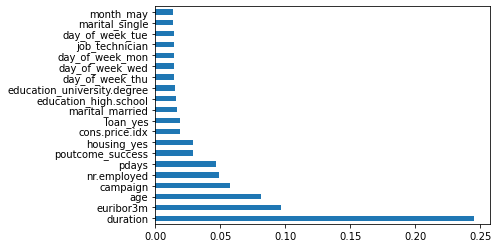

In [37]:
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

In [38]:
df2=feature_importances.nlargest(20).index

In [39]:
new_df=X[df2]

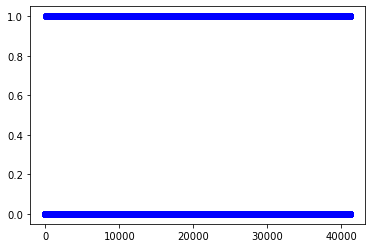

In [40]:
# now will build the svm model

plt.plot(y,'bo')

In [44]:
X=new_df

In [45]:
X

,duration,euribor3m,age,campaign,nr.employed,pdays,poutcome_success,housing_yes,cons.price.idx,loan_yes,marital_married,education_high.school,education_university.degree,day_of_week_thu,day_of_week_wed,day_of_week_mon,job_technician,day_of_week_tue,marital_single,month_may
0,261,4.857,56,1,5191.0,999,0,0,93.994,0,1,0,0,0,0,1,0,0,0,1
1,149,4.857,57,1,5191.0,999,0,0,93.994,0,1,1,0,0,0,1,0,0,0,1
2,226,4.857,37,1,5191.0,999,0,1,93.994,0,1,1,0,0,0,1,0,0,0,1
3,151,4.857,40,1,5191.0,999,0,0,93.994,0,1,0,0,0,0,1,0,0,0,1
4,307,4.857,56,1,5191.0,999,0,0,93.994,1,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,334,1.028,73,1,4963.6,999,0,1,94.767,0,1,0,0,0,0,0,0,0,0,0
41184,383,1.028,46,1,4963.6,999,0,0,94.767,0,1,0,0,0,0,0,0,0,0,0
41185,189,1.028,56,2,4963.6,999,0,1,94.767,0,1,0,1,0,0,0,0,0,0,0
41186,442,1.028,44,1,4963.6,999,0,0,94.767,0,1,0,0,0,0,0,1,0,0,0


In [46]:
# now will split the data into train and test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [47]:
print('X_train =',len(X_train))
print('X_test =',len(X_test))
print('y_train =',len(y_train))
print('y_test =',len(y_test))

X_train = 24712
X_test = 16476
y_train = 24712
y_test = 16476


# Build a model on Training Set

In [48]:
from sklearn import svm

svcT=svm.SVC(kernel='linear',C=1,gamma='auto',probability=True).fit(X_train,y_train)

In [49]:
print(svcT)

SVC(C=1, gamma='auto', kernel='linear', probability=True)


# Do Prediction

In [51]:
y_pred=svcT.predict(X_test)

In [52]:
# Predicted value using Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[14309,   346],
       [ 1178,   643]], dtype=int64)

# Finding Precisioin,Recall and F1 score

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14655
           1       0.65      0.35      0.46      1821

    accuracy                           0.91     16476
   macro avg       0.79      0.66      0.70     16476
weighted avg       0.89      0.91      0.90     16476



# Predicted Probability

# ROC Curve

In [55]:
preds1=svcT.predict_proba(X_test)[:,1]

In [56]:
preds1.shape

(16476,)

# False Positive Rate,True Positive Rate and Threshold

In [57]:
from sklearn.metrics import roc_curve,auc

In [59]:
from sklearn import metrics
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,preds1)

In [60]:
df1=pd.DataFrame(dict(fpr=fpr1,tpr=tpr1))

In [61]:
auc=metrics.auc(fpr1,tpr1)
auc

0.8862362434098862

# ROC Curve

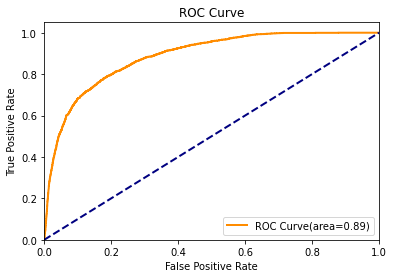

In [62]:
plt.figure()
lw=2
plt.plot(fpr1,tpr1,color='darkorange',lw=lw,label='ROC Curve(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()